In [2]:
# importo la funzione start_kaggle che ho definito nel file autenticazione.py
from autenticazione.autenticazione import start_kaggle

# chiamo la funzione start_kaggle
start_kaggle()

# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# importo le librerie necessarie di default
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Visualizzare la lista dei dataset
key_search = str(input("Inserisci la chiave di ricerca: "))
datasets = kaggle.api.datasets_list(search=key_search)

# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'

print("Lista dei dataset trovati: ")
for i in range(len(datasets)):
    print(f"{i}: {datasets[i]['ref']}")


Lista dei dataset trovati: 
0: vikrishnan/boston-house-prices
1: iamsouravbanerjee/house-rent-prediction-dataset
2: shree1992/housedata
3: anmolkumar/house-price-prediction-challenge
4: harlfoxem/housesalesprediction
5: shibumohapatra/house-price
6: saipavansaketh/pune-house-data
7: mokar2001/house-price-tehran-iran
8: syuzai/perth-house-prices
9: paultimothymooney/zillow-house-price-data
10: iarunava/happy-house-dataset
11: htagholdings/property-sales
12: allen-institute-for-ai/CORD-19-research-challenge
13: fedesoriano/the-boston-houseprice-data
14: mohamedafsal007/house-price-dataset-of-india
15: tawfikelmetwally/chicago-house-price
16: amitabhajoy/bengaluru-house-price-data
17: goldenoakresearch/us-household-income-stats-geo-locations
18: lespin/house-prices-dataset
19: thomasnibb/amsterdam-house-price-prediction


In [4]:
# scelgo il dataset che mi interessa e lo scarico
dt_scelto = int(input("Inserisci il numero del dataset che ti interessa: "))

# salvo in una variabile i nomi di tutti i file del dataset
file_name = kaggle.api.dataset_list_files(datasets[dt_scelto]['ref']).files

# scarico il dataset
kaggle.api.dataset_download_files(datasets[dt_scelto]['ref'], path=path, unzip=True)

In [5]:
for i in range(len(file_name)):
    print(f"File n {i}: {file_name[i]}")


File n 0: HousingPrices-Amsterdam-August-2021.csv


In [6]:
choise = int(input('Scegli il file da aprire: '))
if '.csv' in str(file_name[choise]):
    df = pd.read_csv(path + '/' + str(file_name[choise]))
elif '.json' in str(file_name[choise]):
    df = pd.read_json(path + '/' + str(file_name[choise]))
else:
    print('Formato non riconosciuto')

EDA analisi esplorativa dei dati

In [7]:
# puliamo il dataset dalle colonne che non servono
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
# cominciamo l'esplorazione del dataset con la funzione head()
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [9]:
# vediamo le informazioni sul dataset con la funzione info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.7+ KB


In [10]:
# eliminiamo i valori nulli
df.dropna(inplace=True)

In [11]:
# vediamo le statistiche del dataset con la funzione describe() senza la notazione scientidica
df.describe()


,Price,Area,Room,Lon,Lat
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [12]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [13]:
# vediamo le correlazioni
df.corr()

,Price,Area,Room,Lon,Lat
Price,1.000000,0.835090,0.623448,-0.013561,0.062196
Area,0.835090,1.000000,0.808285,0.021762,0.014179
Room,0.623448,0.808285,1.000000,-0.025753,-0.021168
Lon,-0.013561,0.021762,-0.025753,1.000000,-0.183445
Lat,0.062196,0.014179,-0.021168,-0.183445,1.000000


In [14]:
# dividiamo in tre categorie i valori di prezzo delle case in base al numero delle stanze, e alla area
# 1: piccola
# 2: media
# 3: grande

# creo una funzione che mi permette di dividere i valori in tre categorie
df['price_range'] = df['Price'] / (df['Area'] * df['Room'])


<AxesSubplot:ylabel='Frequency'>

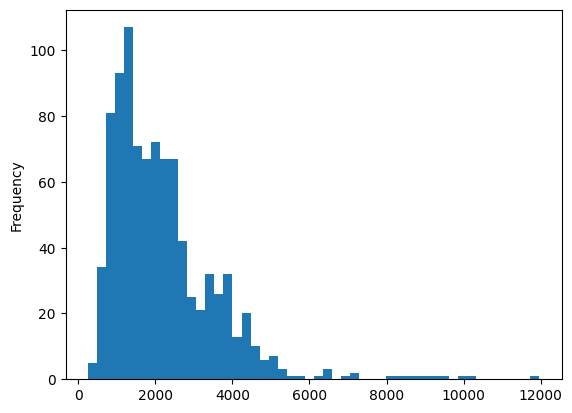

In [15]:
# vediamo la distribuzione dei valori di 'price_range'
df['price_range'].plot(kind='hist', bins=50)

In [16]:
# creiamo una funzione che mi permette di dividere i valori in tre categorie
def price_range(x):
    if x < 2000:
        return 0
    elif x >= 2000 and x < 4000:
        return 1
    else:
        return 2

In [17]:
# applichiamo la funzione alla colonna 'price_range'
df['price_range'] = df['price_range'].apply(price_range)

In [18]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat,price_range
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,1
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,1
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,0
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,0
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,0


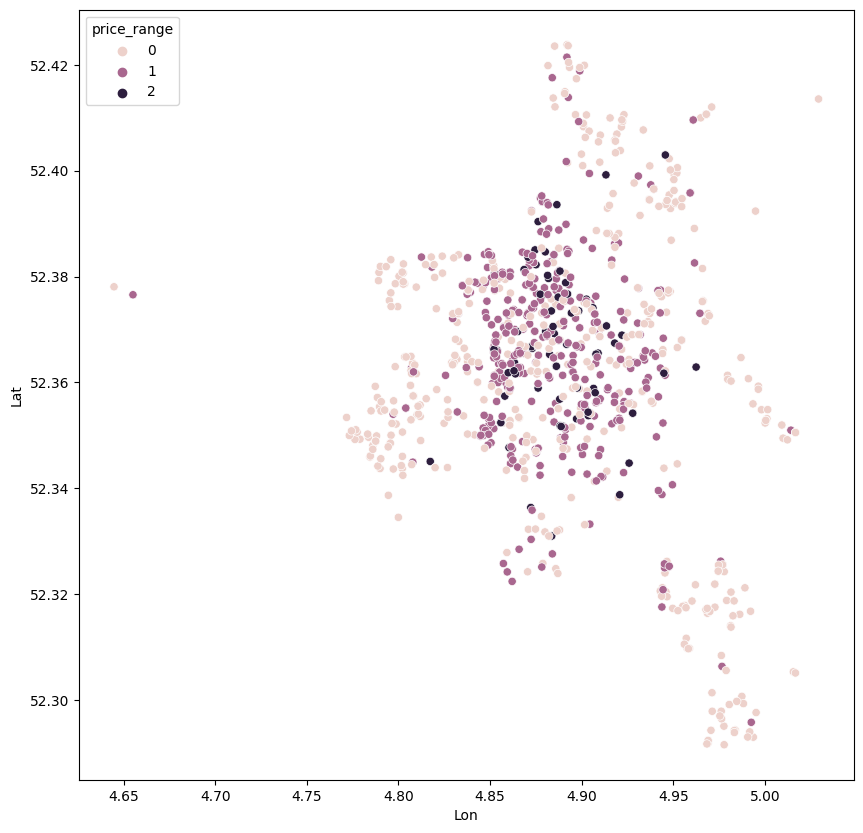

In [19]:
# mettiamo a grafico a dispersione i valori di lon e lat in base alla categoria di prezzo
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Lon', y='Lat', hue='price_range', data=df)
plt.show()

Centroidi:  [[4.88869783e+00 5.23632701e+01 5.65271825e+05 9.11873614e+01
  3.47893570e+00]
 [4.88636194e+00 5.23633417e+01 3.46805556e+06 3.17111111e+02
  7.83333333e+00]]
Etichette:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

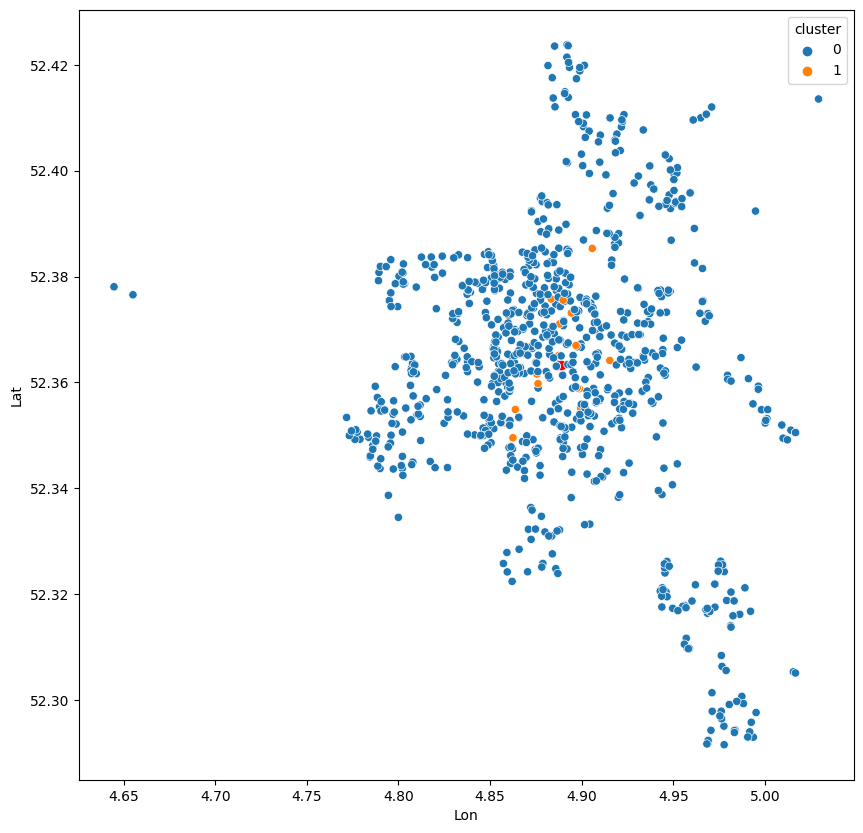

In [20]:
# dividiamo in cluster i valori di lon e lat in base alla categoria di prezzo con la funzione KMeans
from sklearn.cluster import KMeans

# impostiamo il numero di cluster a 3
kmeans = KMeans(n_clusters=2)

# creiamo un nuovo dataframe con le colonne 'Lon' e 'Lat'
X = df[['Lon', 'Lat', 'Price', 'Area', 'Room']]

# addestriamo il modello
kmeans.fit(X)

# vediamo i centroidi
print('Centroidi: ', kmeans.cluster_centers_)

# vediamo le etichette
print('Etichette: ', kmeans.labels_)

# aggiungiamo le etichette al dataframe
df['cluster'] = kmeans.labels_

# mettiamo a grafico a dispersione i valori di lon e lat in base alla categoria di prezzo
plt.figure(figsize=(10, 10))
# printiamo i centroidi
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red')
sns.scatterplot(x='Lon', y='Lat', hue='cluster', data=df)
plt.show()






In [21]:
# vediamo se i cluster con le metriche di valutazione
from sklearn.metrics import silhouette_score, davies_bouldin_score

# printiamo a video i valori di silhouette e davies_bouldin
# se il valore di silhouette è vicino a 1, allora i cluster sono ben separati
print(f"Silhouette: {silhouette_score(X, kmeans.labels_)}")

# se il valore di davies_bouldin è vicino a 0, allora i cluster sono ben separati
print(f"Davies Bouldin: {davies_bouldin_score(X, kmeans.labels_)}")

Silhouette: 0.8706198793990974
Davies Bouldin: 0.4321083811540201


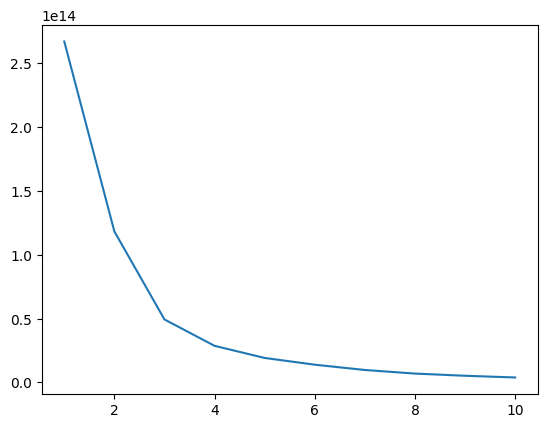

3


In [23]:
# usiamo la funzione elbow per trovare il numero ottimale di cluster
# creiamo una lista vuota
inertia = []

# impostiamo il numero di cluster da 1 a 10
for i in range(1, 11):
    # creiamo un modello con il numero di cluster impostato
    kmeans = KMeans(n_clusters=i)
    # addestriamo il modello
    kmeans.fit(X)
    # aggiungiamo alla lista il valore di inertia
    inertia.append(kmeans.inertia_)


# mettiamo a grafico i valori di inertia
plt.plot(range(1, 11), inertia)
plt.show()

# calcoliamo il valore migliore di inerzia con il metodo del gomito
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
print(kl.elbow)




In [ ]:
# vediamo quale è il numero di cluster migliore
# impostiamo il numero di cluster da 2 a 10
for i in range(2, 11):

    # impostiamo il numero di cluster
    kmeans = KMeans(n_clusters=i)

    # addestriamo il modello
    kmeans.fit(X)

    # printiamo a video i valori di silhouette e davies_bouldin
    # se il valore di silhouette è vicino a 1, allora i cluster sono ben separati
    print(f"Silhouette: {silhouette_score(X, kmeans.labels_)}")

    # se il valore di davies_bouldin è vicino a 0, allora i cluster sono ben separati
    print(f"Davies Bouldin: {davies_bouldin_score(X, kmeans.labels_)}")

    print(f"Numero di cluster: {i}")

    print('---------------------------')

Silhouette: 0.8706198793990974
Davies Bouldin: 0.4321083811540201
Numero di cluster: 2
---------------------------
Silhouette: 0.713271998489666
Davies Bouldin: 0.4574976330875325
Numero di cluster: 3
---------------------------
Silhouette: 0.6443685842300547
Davies Bouldin: 0.48456712551968656
Numero di cluster: 4
---------------------------
Silhouette: 0.626087743572293
Davies Bouldin: 0.4943005911054281
Numero di cluster: 5
---------------------------
Silhouette: 0.5729417632428359
Davies Bouldin: 0.5073505739038103
Numero di cluster: 6
---------------------------
Silhouette: 0.5874852082504646
Davies Bouldin: 0.48894447838347654
Numero di cluster: 7
---------------------------
Silhouette: 0.57356484024404
Davies Bouldin: 0.48601375493339305
Numero di cluster: 8
---------------------------
Silhouette: 0.5760562773575681
Davies Bouldin: 0.4040438652480604
Numero di cluster: 9
---------------------------
Silhouette: 0.5667279632878397
Davies Bouldin: 0.4101470074821493
Numero di clust